In [216]:
import itertools
import random
import time
import seaborn as sns
import pandas as pd

In [217]:
def SubsetSumBF(S,x):
    '''If there is a subset of list S that adds up to x, 
    returns True and the first subset found that adds up
    to x. If there isn't, it returns False'''
    n=len(S)
    for i in range(1,(n+1)):
        for j in itertools.combinations(S,i):
            if sum(j)==x:
                return(True, j)
    return False
                        

In [218]:
S=[12,3,4,6,8,0,7,5,4]

In [219]:
SubsetSumBF(S,20)

(True, (12, 8))

In [258]:
def SubsetSumDP(S,x):
    '''If there is a subset of list S that adds up to x, 
    returns True and the first subset found that adds up
    to x. If there isn't, it returns False'''
    n=len(S)    
        
    #base
    if n == 0:
        if x > 0: #set is empty and sum is >0
            return False
        elif x == 0: 
            return True
    elif x == 0:
        return True

    #recursive
    if n>0:
        return (SubsetSumDP(S[:(n-1)],x) or SubsetSumDP(S[:(n-1)],(x-S[n-1])))
    
    return False

In [259]:
SubsetSumDP(S,20)

True

In [297]:
def Sets(n,maxMember,seed=None):
    try:
        isinstance(maxMember, int)
    except:
        "Please provide an integer for your second argument"
    
    '''creates lists with n items each, 
    where the maximum member is maxMember
    Optional: provide seed '''
    random.seed(seed)
    output = [None]*n
    for i in range(0,(n-1)):
        output[i]=random.randint(0,n)
    output[n-1]=maxMember
    
    return output

In [298]:
Sets(10,100,1)

[2, 9, 1, 4, 1, 7, 7, 7, 10, 100]

In [304]:
lengths = [4,8,10,20,43,56,100,1000]
maxMembers = [4,15,17,37,59,99,131,567]

DPoutput = [None]*len(lengths)
BFoutput = [None]*len(lengths)

for i in range(0,(len(lengths))):
    sampleSet = Sets(lengths[i],maxMembers[i])
    
    startTimeBF = time.perf_counter() 
    SubsetSumBF(sampleSet,27)
    endTimeBF = time.perf_counter() 
    startTimeDP = time.perf_counter() 
    SubsetSumDP(sampleSet,27)
    endTimeDP =time.perf_counter()
    
    BFoutput[i] = (endTimeBF-startTimeBF)
    DPoutput[i] = (endTimeDP-startTimeDP)

In [305]:
print(BFoutput,"\n",DPoutput)

[1.1299998732283711e-05, 3.480000304989517e-05, 2.970000059576705e-05, 2.390000008745119e-05, 5.700003384845331e-06, 8.489999891025946e-05, 0.00016710000272723846, 1.1600001016631722e-05] 
 [2.059999678749591e-05, 6.580000263056718e-05, 0.00013110000145388767, 2.640000093379058e-05, 0.018287599999894155, 0.00012710000009974465, 0.7987089000016567, 0.053841600001760526]


In [306]:
df=pd.DataFrame(zip(lengths,maxMembers,BFoutput,DPoutput),columns=["Length","Max","BFtime","DPtime"])
df

,Length,Max,BFtime,DPtime
0,4,4,0.000011,0.000021
1,8,15,0.000035,0.000066
2,10,17,0.000030,0.000131
3,20,37,0.000024,0.000026
4,43,59,0.000006,0.018288
5,56,99,0.000085,0.000127
6,100,131,0.000167,0.798709
7,1000,567,0.000012,0.053842


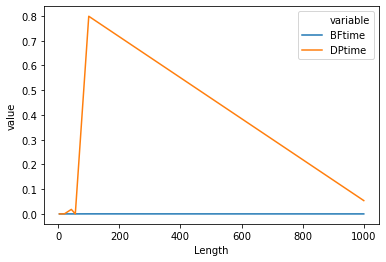

In [307]:
tidy_df=pd.melt(df,id_vars=["Length","Max"],value_vars=["BFtime","DPtime"])
tidy_df
sns.lineplot(data=tidy_df, y="value",x="Length",hue="variable")

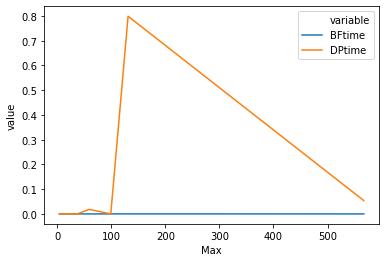

In [308]:
sns.lineplot(data=tidy_df, y="value",x="Max",hue="variable")